In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [20]:
# 2.3.1 : Chargement et Analyse Exploratoire (EDA)
# Chargement du Dataset Credit Card Fraud Detection (Kaggle)
df = pd.read_csv('creditcard.csv') 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Taille du dataset : (284807, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 

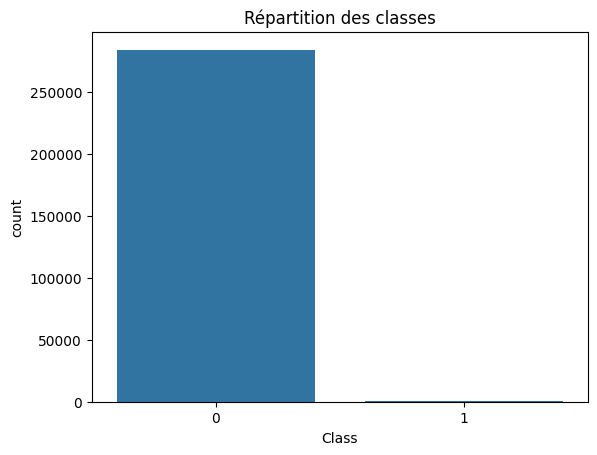

In [21]:
# Taille du dataset
print("Taille du dataset :", df.shape)

# Types des colonnes
print(df.info())

# Statistiques générales
print(df.describe())

# Répartition des classes (0 = normal, 1 = fraude)
sns.countplot(x='Class', data=df)
plt.title("Répartition des classes")
plt.show()

In [22]:
# 2.3.2 : Préparation des Données

# Mise à l'échelle de 'Amount'
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Retirer la colonne 'Amount' de notre dataframe
df = df.drop(['Amount'], axis=1)

# Séparation features / label
X = df.drop(['Class'], axis=1)
y = df['Class']

# Séparation en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [28]:
#  2.3.3 : Entraînement du Modèle
#  Modèle avec gestion du déséquilibre
# class_weight ='balanced' = corrige le déséquilibre entre fraudes et non-fraudes
# random_state=42 = garantit des résultats identiques à chaque exécution
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

print("Modèle entraîné")
print(model)


Modèle entraîné
RandomForestClassifier(class_weight='balanced', random_state=42)


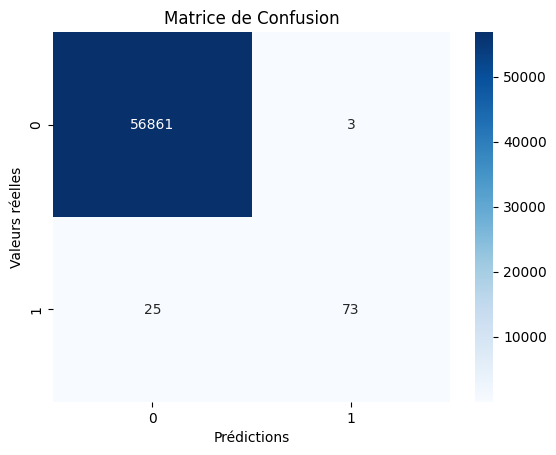

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
# Prédiction sur test
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de Confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

# Rapport de classification
print(classification_report(y_test, y_pred))


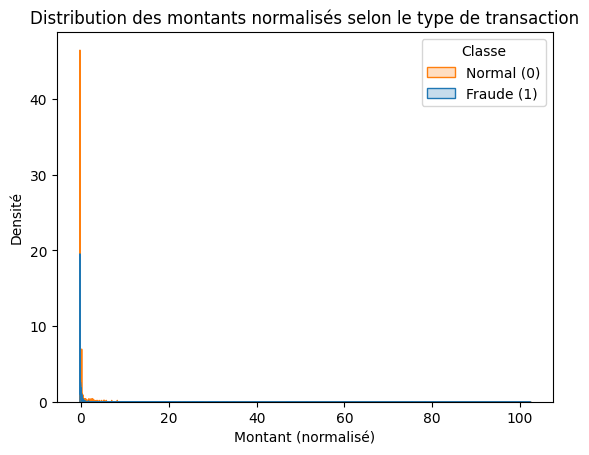

In [ ]:
# P2 Questions mettez unexemple via argumentation et image
import seaborn as sns
import matplotlib.pyplot as plt

# Affichage des montants pour les deux classes
sns.histplot(data=df, x='scaled_amount', hue='Class', element='step', stat='density', common_norm=False)
plt.title("Distribution des montants normalisés selon le type de transaction")
plt.xlabel("Montant (normalisé)")
plt.ylabel("Densité")
plt.legend(title="Classe", labels=["Normal (0)", "Fraude (1)"])
plt.show()
